In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
dfDecision = pd.read_csv("data/bank.csv",sep=";")
print(dfDecision.shape)
dfDecision.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
dfDecision.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
print(dfDecision.y.value_counts())

y
no     4000
yes     521
Name: count, dtype: int64


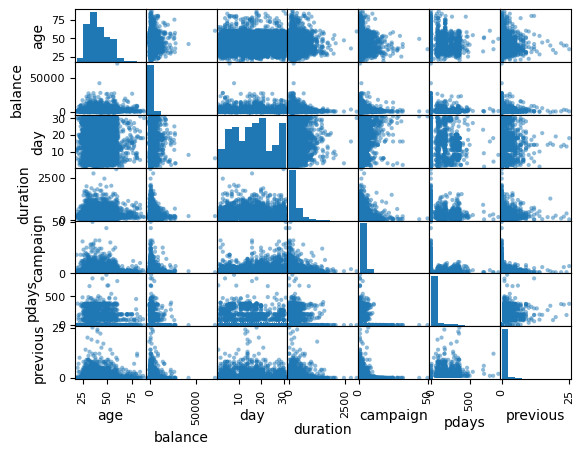

In [5]:
scatter_matrix(dfDecision)
plt.show()

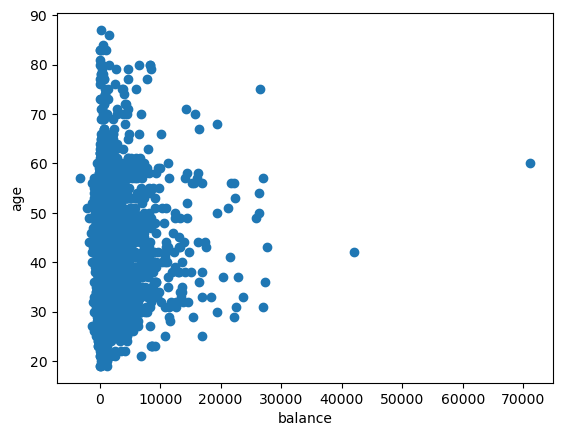

In [6]:
# Lets have a closer look at age and balance
plt.scatter(dfDecision.balance, dfDecision.age)
plt.xlabel("balance")
plt.ylabel("age")
plt.show()

In [7]:
# d = df.to_numpy()
# # Do glucose (index 1) and insulin (index 4) seperate the classes? 

# plt.scatter(
#     d[d[:,8] == 0, 1], d[d[:,8] == 0, 4],
#     c='lightgreen', marker='s', edgecolor='black',
#     label='negative'
# )


# plt.scatter(
#     d[d[:,8] == 1, 1], d[d[:,8] == 1, 4],
#     c='orange', marker='o', edgecolor='black',
#     label='positive'
# )

# plt.xlabel('glucose')
# plt.ylabel('insulin')
# plt.legend(loc="upper left")

# plt.show()

In [8]:
#Duration of the call is unknown before the call is over so has no value in predicitng who to call
X = dfDecision.drop(columns =['y','duration'])
y = dfDecision.y
print("X: ",X.shape)
X = pd.get_dummies(X)
print("onehot Encode: ",X.shape)
print("y: ",y.shape)

X:  (4521, 15)
onehot Encode:  (4521, 50)
y:  (4521,)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3616, 50)
(3616,)
(905, 50)
(905,)


In [83]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(random_state=1)
# tree = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

31


In [84]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))


Training Accuracy: 1.0


In [85]:
#Predict the response for test dataset
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.8077348066298342


In [86]:
maxscore = 0
bestD = 0
for d in range(1,40) :
    model = DecisionTreeClassifier(max_depth=d,random_state=1)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    #print(scores)
    if (abs(maxscore) < abs(scores.mean())):
        maxscore = scores.mean()
        bestD=d
    # Model Accuracy, how often is the classifier correct?
    print("Depth: ", d, "Accuracy:", scores.mean())
print("Best value of D: ",bestD)
print("Gives score of:", maxscore)

Depth:  1 Accuracy: 0.8965727516563124
Depth:  2 Accuracy: 0.8957432582166082
Depth:  3 Accuracy: 0.8949141468558721
Depth:  4 Accuracy: 0.8924245202998555
Depth:  5 Accuracy: 0.8918727982699464
Depth:  6 Accuracy: 0.8896597968868205
Depth:  7 Accuracy: 0.8877245669134897
Depth:  8 Accuracy: 0.8910429227512742
Depth:  9 Accuracy: 0.8902115189167297
Depth:  10 Accuracy: 0.8874467955036947
Depth:  11 Accuracy: 0.8835770997149691
Depth:  12 Accuracy: 0.8788767642496351
Depth:  13 Accuracy: 0.8761097483627915
Depth:  14 Accuracy: 0.8736189755698707
Depth:  15 Accuracy: 0.8683634793639149
Depth:  16 Accuracy: 0.8628336504588769
Depth:  17 Accuracy: 0.8545345131931867
Depth:  18 Accuracy: 0.8545345131931867
Depth:  19 Accuracy: 0.8487265307993856
Depth:  20 Accuracy: 0.8456882388452046
Depth:  21 Accuracy: 0.836562282692587
Depth:  22 Accuracy: 0.8365603722977465
Depth:  23 Accuracy: 0.8302014320319724
Depth:  24 Accuracy: 0.8321358978473672
Depth:  25 Accuracy: 0.8271585551301743
Depth:  26

Depth of 1 is greatest

In [95]:
model = DecisionTreeClassifier(max_depth=1, random_state=1)
model.fit(X_train,y_train)

print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.896570796460177
Test Accuracy: 0.8784530386740331


In [90]:
y_hat = model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
tn, fp, fn, tp = cm.ravel()
print("TN", tn, "FP", fp, "FN", fn, "TP", tp)

CM [[779  11]
 [ 99  16]]

TN 779 FP 11 FN 99 TP 16


from this I can see that the model would be more accurate if it simply returned y="no"

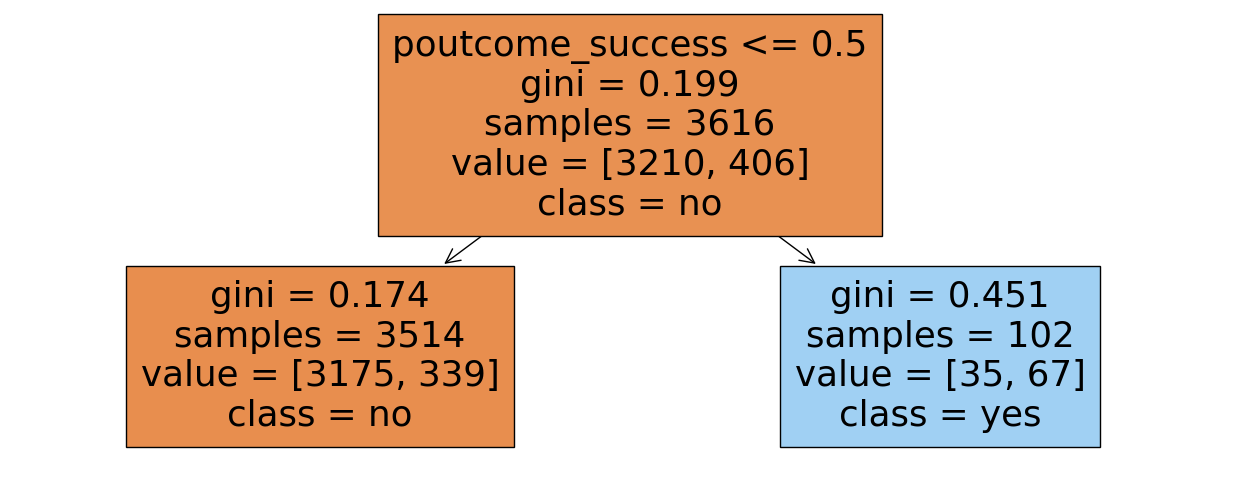

In [92]:
from sklearn.tree import plot_tree

col_names=X.columns.tolist()
feature_names = col_names
plt.figure(figsize=(16, 6))
plot_tree(model, filled=True, feature_names = feature_names, class_names = ['no', 'yes'])
plt.savefig('plots/bankDecisionTree4level.svg', format = 'svg')
plt.show()